# Advanced Interactivity

In [5]:
import networkx as nx
import altair as alt
import nx_altair as nxa
import numpy as np

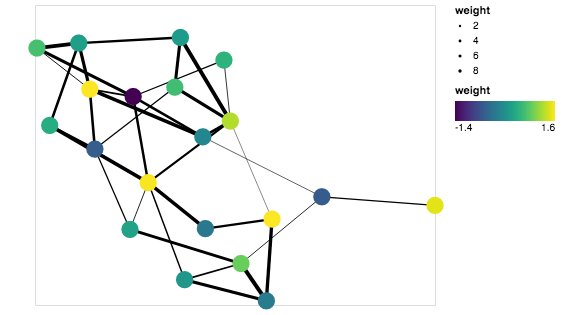

In [6]:
# Generate a random graph
G = nx.fast_gnp_random_graph(n=20, p=0.25)

# Compute positions for viz.
pos = nx.spring_layout(G)

chart = nxa.core.to_chart(G, pos)

# Add weights
for n in G.nodes():
    G.nodes[n]['weight'] = np.random.randn()
    G.nodes[n]['name'] = np.random.randint(1000)
    G.nodes[n]['z'] = 'hello'

for e in G.edges():
    G.edges[(e[0],e[1])]['weight'] = np.random.uniform(1, 10)
    

chart = nxa.core.to_chart(G, pos)
nxa.draw_networkx_nodes(
    chart=chart,
    node_color='weight',
    cmap='viridis',
    tooltip=['weight', 'name', 'z']
)

nxa.draw_networkx_edges(
    chart=chart,
    width='weight',
    tooltip=['weight']
)

chart

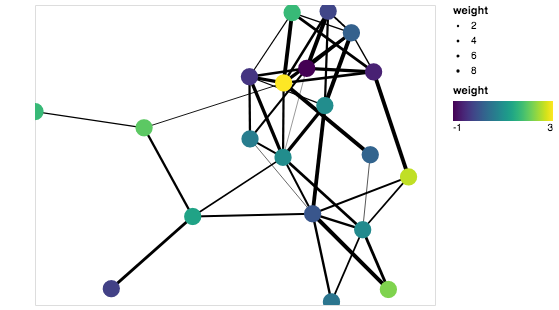

In [3]:
chart.interactive()